При моделировании вероятности в качестве априорного распределения в нашем случае хорошо подойдет бета-распределение. (Почему? Потому что оно ограничено значениями от 0 до 1, что совпадает с диапазоном значений, допустимым для вероятностей.)

Пусть априорное распределение имеет вид Beta(1, 1). Оно идентично равномерному распределению на отрезке [0, 1].

In [5]:
from scipy.stats import beta 

visitors_to_A = 1300 
visitors_to_B = 1275

conversions_from_A = 120 
conversions_from_B = 125

alpha_prior = 1 
beta_prior = 1

posterior_A = beta(alpha_prior + conversions_from_A, beta_prior + visitors_to_A - conversions_from_A)
posterior_B = beta(alpha_prior + conversions_from_B, beta_prior + visitors_to_B - conversions_from_B)

Далее нам нужно определить, в какой группе вероятность конверсии выше. Для этого аналогично МСМС мы возьмем выборки из апостериорного распределения и оценим вероятность того, что выборки из апостериорного распределения А больше выборок из распределения В

In [6]:
samples = 20000 # Для повышения точности число выборок должно быть большим. 
samples_posterior_A = posterior_A.rvs(samples) 
samples_posterior_B = posterior_B.rvs(samples)
print ((samples_posterior_A > samples_posterior_B).mean())

0.30605


Как видим, вероятность того, что конверсия сайта А лучше, чем сайта В, равна 31%

# Добавляем линейную функцию потерь

Пусть пользователям демонстрируются два различных варианта страницы с расценками и мы хотели бы оценить ожидаемую выручку (expected revenue) из расчета на один показ.

In [37]:
from numpy.random import dirichlet

N_A = 1000
N_A_79 = 10
N_A_49 = 46
N_A_25 = 80
N_A_0 = N_A - (N_A_79 + N_A_49 + N_A_49)
observations_A = np.array([N_A_79, N_A_49, N_A_25, N_A_0])

N_B = 2000
N_В_79 = 45
N_B_49 = 84
N_В_25 = 200
N_B_0 = N_B - (N_В_79 + N_B_49 + N_В_25)
observations_B = np.array([N_В_79, N_B_49, N_В_25, N_B_0])

def expected_revenue(P):
    return 79*P[:,0] + 49*P[:,1] + 25*P[:,2] + 0*P[:,3]

prior_parameters = np.array([1,1,1,1])

posterior_samples_A = dirichlet(prior_parameters + observations_A, size=10000)
posterior_samples_B = dirichlet(prior_parameters + observations_B, size=10000)
posterior_expected_revenue_A = expected_revenue(posterior_samples_A)

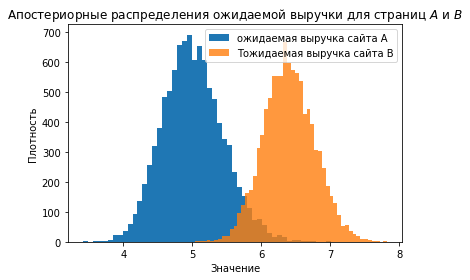

In [38]:
posterior_expected_revenue_B = expected_revenue(posterior_samples_B)
plt.hist(posterior_expected_revenue_A, histtype='stepfilled',label=u'ожидаемая выручка сайта A', bins=50)
plt.hist(posterior_expected_revenue_B, histtype='stepfilled',label='Tожидаемая выручка сайта В', bins=50, alpha=0.8)
plt.xlabel(u'Значение')
plt.ylabel(u'Плотность')
plt.title(u"Апостериорные распределения ожидаемой выручки для страниц $А$ и $В$")
plt.legend();

In [39]:
p = (posterior_expected_revenue_B > posterior_expected_revenue_A).mean()
print ("Вероятность того, что выручка страницы В больше, чем страницы A: %.3f"%p)

Вероятность того, что выручка страницы В больше, чем страницы A: 0.993


Значение 99% достаточно велико, чтобы быть статистически значимым, так что имеет смысл выбрать для промышленной эксплуатации страницу В.